In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [2]:
path = 'data/final_data_rev/train/' 
DATA = pd.read_csv(path+'max_feature.csv')

display(DATA.head())
print('DataShape : ', DATA.shape)

,acc_id,label,guild,cnt_dt,play_time,npc_exp,npc_hongmun,quest_exp,quest_hongmun,item_hongmun,...,target_money,source_weapon,target_weapon,source_gem,target_gem,source_costume,target_costume,source_accessory,target_accessory,payment
0,b8fbf3f6a70e3f36843bffc70c18ff51a0d755a87616ec...,week,-0.348442,3.0,1.519815,2.910685,0.000000,2.852241,2.332910,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,ed500c4957956b3e99dc3985666850b582f812405eefb6...,week,-0.348442,7.0,4.698532,9.147854,0.000000,8.584935,5.995250,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,acc6afa23a6bf15e18151e4794c7789225ef9d682f473c...,week,-0.348442,3.0,1.110035,2.916233,0.000000,2.431554,1.261065,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,34095a3c9a2937ced3ea3fd75e22ce177dc5879d2a53f7...,week,-0.348442,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.428232
4,26f3db6e8817a93c4ceda9a16f0832945e43d950b95882...,week,-0.348442,3.0,0.000000,1.319653,0.025157,1.086231,1.515462,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


DataShape :  (100000, 53)


# Feature Importance Scores

In [3]:
X = DATA.iloc[:,2:]
col_names = X.columns
X = X.values
y = DATA.loc[:,'label'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

model score :  0.6770333333333334


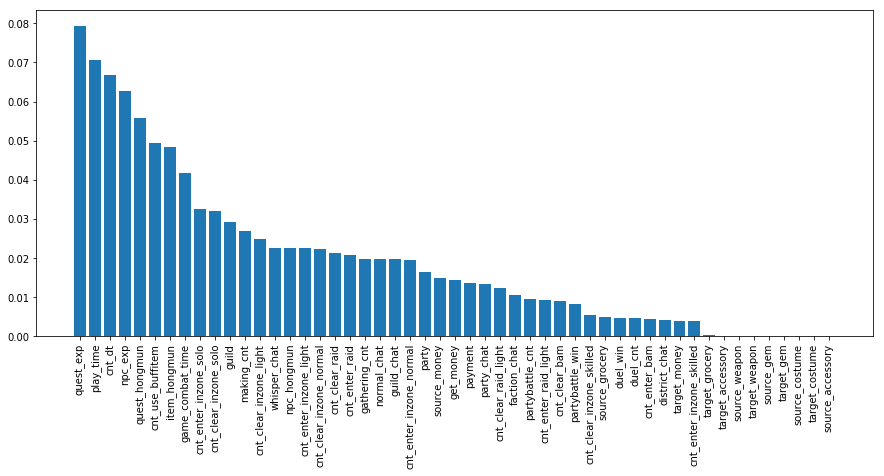

In [4]:
# Fit random forest model
model = RandomForestClassifier(n_estimators=500, random_state=1)
model.fit(X_train,y_train)
print("model score : ", model.score(X_test,y_test))

sort = pd.Series(model.feature_importances_)
sort = sort.sort_values(ascending = False)

# Plot feature importance scores
plt.figure(figsize=(15,6))
plt.bar(col_names[sort.index], sort)
plt.xticks(rotation = 'vertical')
plt.show()

In [5]:
print("model score : ", model.score(X_train,y_train))

model score :  0.7954857142857142


In [5]:
temp = pd.DataFrame(sort)
temp.index = col_names[sort.index]
temp = temp.reset_index()
temp.columns = ['feature', 'importance']
# temp.to_csv(path+'feature_list.csv', index = False, encoding = False)

# Feature Selection by Recursive Feature elimination

Selected Features : 
cnt_dt
play_time
npc_exp
quest_exp
quest_hongmun
item_hongmun
cnt_clear_inzone_solo
cnt_clear_inzone_light
whisper_chat
cnt_use_buffitem


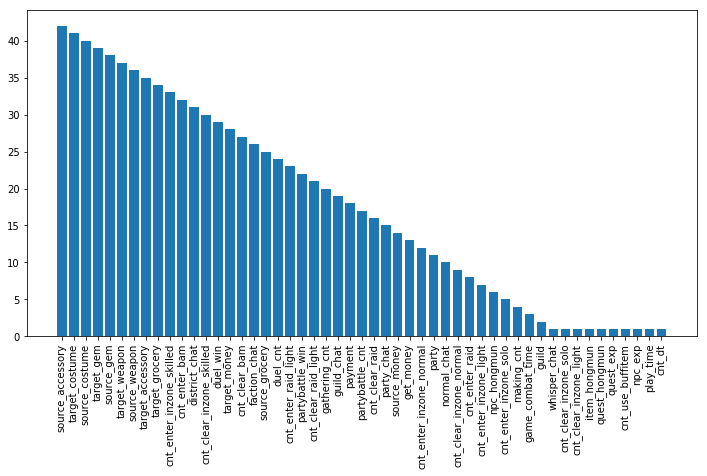

In [6]:
rfe = RFE(RandomForestClassifier(n_estimators=20, random_state=1), 10)
fit = rfe.fit(X, y)

# report selected features
print('Selected Features : ')
for i in range(len(fit.support_)):
    if fit.support_[i]:
        print(col_names[i])

sort = pd.Series(fit.ranking_)
sort = sort.sort_values(ascending = False)
        
# plot feature rank
plt.figure(figsize=(12,6))
plt.bar(col_names[sort.index], sort)
plt.xticks(rotation = 'vertical')
plt.show()